# Machine Learning using Sklearn with a Focus on practical implementation
Designed for an introductory workshop introducing the scikit-learn package and how to get start using the models for research work (especially with an emphasis on the social sciences). Implementation mostly focuses on regression problems and Random Forests.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Data Preprocessing

In [94]:
# Read data, take look
df = pd.read_csv('https://bit.ly/35NRNoD',index_col=0)
df.head()

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,89,NaN,NaN,2012,NaN,122.13,2.067825,2.000162e+10,NaN,NaN,...,82.6,448007.0,31161376.0,23.4,NaN,NaN,75.840,0.601426,7528588.0,8
Albania,64,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,NaN,45.670,14.215342,1575788.0,1
Algeria,64,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,NaN,NaN,...,26.1,-143268.0,37383887.0,5.0,101.450180,NaN,31.085,1.093393,25763106.0,4
Angola,85,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,NaN,NaN,...,105.8,87322.0,25107931.0,35.1,NaN,NaN,38.732,5.856513,15383127.0,5
Argentina,68,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,NaN,38027774.0,1


In [95]:
#Check shape and variables
print(df.shape, "\n")

var_names = list(df.columns) 
print(var_names)

(162, 21) 

['CPI_2015', 'Risk_Dec_15', 'Risk_Nov_14', 'year', 'electric_percap', 'food_prod_index', 'percent_forest', 'gdp', 'income_bottom_20', 'literacy_male', 'literacy_female', 'childmort', 'net_migration', 'pop', 'undernourish', 'school_complete', 'researchers', 'rural_pop', 'total_debt', 'urban_pop', 'row_na']


In [96]:
# make NAs machine-friendly
df = df.fillna(-9999)
df.head()

,CPI_2015,Risk_Dec_15,Risk_Nov_14,year,electric_percap,food_prod_index,percent_forest,gdp,income_bottom_20,literacy_male,...,childmort,net_migration,pop,undernourish,school_complete,researchers,rural_pop,total_debt,urban_pop,row_na
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,89,-9999.0,-9999.0,2012,-9999.000000,122.13,2.067825,2.000162e+10,-9999.0,-9999.000000,...,82.6,448007.0,31161376.0,23.4,-9999.000000,-9999.00000,75.840,0.601426,7528588.0,8
Albania,64,67.8,66.3,2012,2118.327776,133.04,28.262044,1.231978e+10,8.9,98.352608,...,10.7,-93425.0,2900401.0,6.0,98.911697,-9999.00000,45.670,14.215342,1575788.0,1
Algeria,64,64.3,68.3,2012,1237.966507,149.67,0.811675,2.090590e+11,-9999.0,-9999.000000,...,26.1,-143268.0,37383887.0,5.0,101.450180,-9999.00000,31.085,1.093393,25763106.0,4
Angola,85,59.0,65.8,2012,219.253430,152.82,46.707627,1.280529e+11,-9999.0,-9999.000000,...,105.8,87322.0,25107931.0,35.1,-9999.000000,-9999.00000,38.732,5.856513,15383127.0,5
Argentina,68,66.5,63.8,2012,3000.603523,108.03,10.232215,5.459824e+11,4.9,99.111130,...,13.3,30000.0,41733271.0,3.7,103.231369,1199.36089,8.879,-9999.000000,38027774.0,1


In [97]:
# Save in format for machine
X = df.iloc[:, 1:len(var_names)]
y = df['CPI_2015']

print(y.shape)
print(X.shape)

X_small= X['childmort'].values.reshape(-1, 1) #worth doing step by step, -1 means "undetermined length"
X_small.shape

(162,)
(162, 20)


(162, 1)

## Training, predicting, Visualization
First we run a decision tree with large min leaf size, then one with a smaller sample size to show the effect. Note how easy sklearn makes it to get started! Can even do it in three lines!

In [98]:
#Set Seed (global)
np.random.seed(1234)

#run model
rfr1 = RandomForestRegressor(n_estimators=1, min_samples_leaf=7)
print(rfr1) #note defaults

#reshape 1d X to 2d array and fit
rfr1.fit(X_small, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Congrats on doing machine learning!**

Let's train a second model to compare to the first later, only difference is now we allow the algorithm to make a larger number of leaves

In [99]:
rfr2 = RandomForestRegressor(n_estimators=1, min_samples_leaf=1)
rfr2.fit(X_small, y)
rfr2

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
# Make Predictions:
X_pred = np.arange(0.0, 140.0, 0.1)[:, np.newaxis] #reshaping again
y_pred = rfr1.predict(X_pred)
y_pred2= rfr2.predict(X_pred)

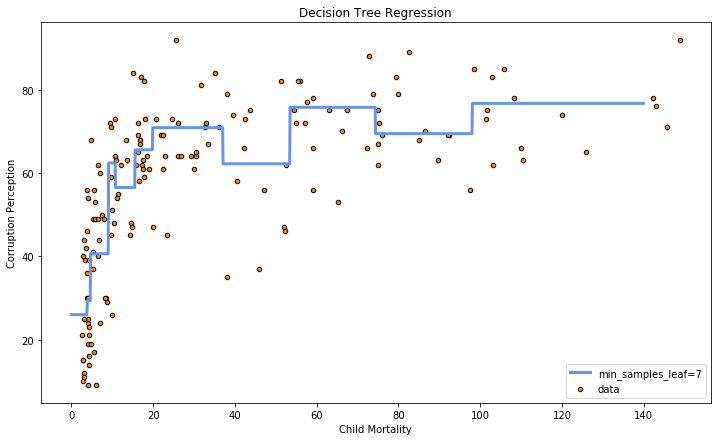

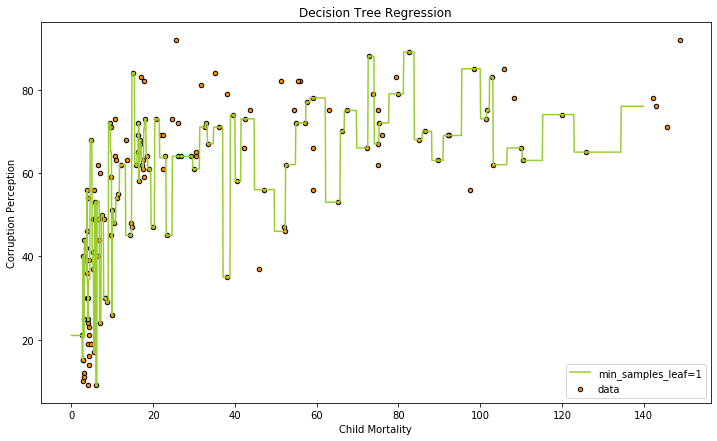

In [101]:
# Visualize the tree (No Overfitting)
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred, color="cornflowerblue",
         label="min_samples_leaf=7", linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Visualize the tree
# Plot the results
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred2, color="yellowgreen", label="min_samples_leaf=1")
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


### Demonstrate RandomForest output

Now we will compare the simpler decision tree to a random forest (or an ensemble of decision trees).

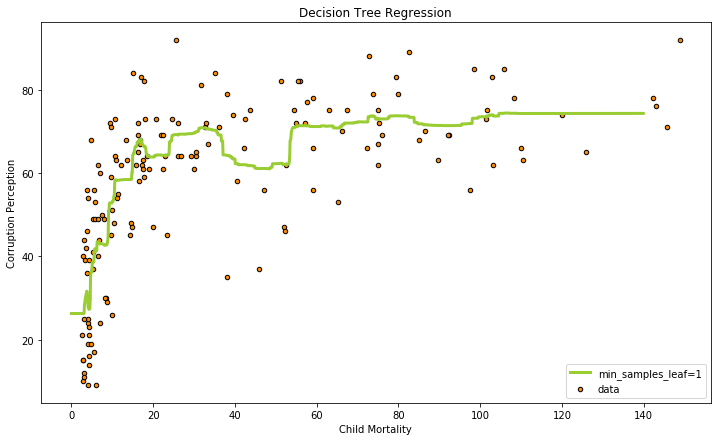

In [102]:
#Now Build a random forest with 1000 trees and a min_samples_leaf=7
rfr3 = RandomForestRegressor(n_estimators=1000, min_samples_leaf=7,random_state=346234) #random state another way to not set seed
rfr3.fit(X_small, y)
y_pred3 = rfr3.predict(X_pred)

# Plot
plt.figure(figsize=(12,7))
plt.scatter(X_small, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_pred, y_pred3, color="yellowgreen", label="min_samples_leaf=1",linewidth=3)
plt.xlabel("Child Mortality")
plt.ylabel("Corruption Perception")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


## Check Accuracy on Training and Testing Data

Remember that the decision tree rfr1 is less overfit than rfr2.  What do you expect this means for training accuracy and testing accuracy respectively?

In [110]:
# Split up into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_small,y, test_size=0.25) #testing on 25% of the data

print(X_train.shape)
print(X_test.shape)

# Retrain on ONLY training dataset
rfr1.fit(X_train, y_train)
rfr2.fit(X_train, y_train)

(121, 1)
(41, 1)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [111]:
#Evaluate on training set to get MSE
y_model1 = rfr1.predict(X_train)
y_model2 = rfr2.predict(X_train)

mse_train1 = (y_model1 - y_train)**2
mse_train2 = (y_model2 - y_train)**2

mse_train1 = mse_train1.sum()/len(y_train)
mse_train2 = mse_train2.sum()/len(y_train)

print("Training error of model 1: ",mse_train1)
print("Training error of model 2: ", mse_train2)

Training error of model 1:  136.3526330209297
Training error of model 2:  101.75918273645547


#### The training error of the more overfit model is less than the less overfit model! Did you expect this result?  

In [112]:
y_model1 = rfr1.predict(X_test)
y_model2 = rfr2.predict(X_test)

mse_test1 = (y_model1 - y_test)**2
mse_test2 = (y_model2 - y_test)**2

mse_test1 = mse_test1.sum()/len(y_test)
mse_test2 = mse_test2.sum()/len(y_test)

print("Testing error of model 1: ",mse_test1)
print("Testing error of model 2: ", mse_test2)

Testing error of model 1:  238.22200748072882
Testing error of model 2:  374.0819783197832


#### The less overfit model has a lower testing error.  This shows why it's so important to test on held out data. How does the error for our random forest `rfr3` compare to the above?

*Note you can use the `KFold` function in `sklearn.model_selection` to do accuracy testing in a more automated way. Likewise remember that CV uses the whole dataset as both testing and trainig datas rotating through all possible splits.*

In [114]:
rfr3.fit(X_train, y_train)

y_model3 = rfr3.predict(X_test)
mse_test3 = (y_model3 - y_test)**2
mse_test3 = mse_test3.sum()/len(y_test)

print("Testing error of model 3: ",mse_test3)

Testing error of model 3:  204.17890081443196


## Exercise:
Using what you've learned today, create your own model to predict corruption from the covariates. Pick variables you think are relevant (and that might cause corruption perception to be higher or lower). Do testing on your model to pick the best hyperparameters.

**Bonus Q:** Make up some realitistic values for the variables for a fake country. See what the model predicts for this country.  Does your model predict that corruption will be high or low in this fake country?